# Deep Learning for Image Classification with PyTorch
- [Workshop video](https://www.youtube.com/watch?v=Ne25VujHRLA)
- This workshop will classify images using deep learning with PyTorch library.

[![Intro / Fashion Classification Project ](https://img.youtube.com/vi/Ne25VujHRLA/0.jpg)](https://www.youtube.com/watch?v=Ne25VujHRLA)

In [1]:
# Import necessary libraries
import os

import numpy as np
import torch
from PIL import Image
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader

In [2]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 40.23 MiB/s, done.
Resolving deltas: 100% (10/10), done.


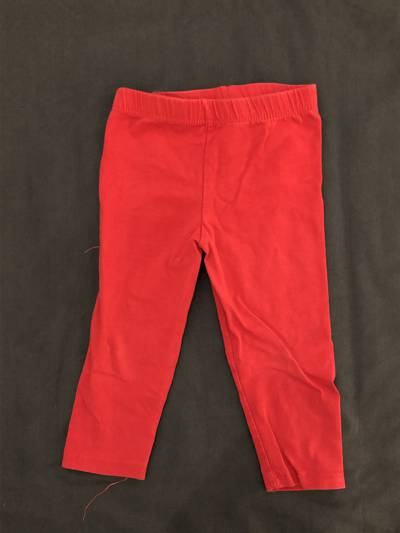

In [3]:
img = Image.open('./clothing-dataset-small/train/pants/0a7e5fe0-d592-40e6-b9b8-75aac9a2d685.jpg')
img

In [4]:
# resize the image
img = img.resize((224, 224))

# make it a numpy array
img_array = np.array(img)

img_array[0]

array([[73, 66, 56],
       [72, 65, 55],
       [70, 63, 53],
       [68, 61, 51],
       [70, 63, 53],
       [71, 64, 54],
       [69, 62, 52],
       [68, 61, 51],
       [67, 60, 50],
       [72, 65, 55],
       [70, 63, 53],
       [70, 63, 53],
       [74, 67, 57],
       [74, 67, 57],
       [73, 66, 56],
       [73, 66, 56],
       [73, 66, 56],
       [73, 66, 56],
       [70, 63, 53],
       [70, 63, 53],
       [70, 63, 53],
       [70, 63, 53],
       [70, 63, 53],
       [71, 64, 54],
       [71, 64, 54],
       [72, 65, 55],
       [72, 64, 54],
       [69, 60, 51],
       [70, 61, 52],
       [72, 63, 54],
       [73, 64, 55],
       [72, 63, 54],
       [73, 64, 55],
       [74, 65, 56],
       [72, 63, 54],
       [70, 61, 52],
       [73, 64, 55],
       [73, 64, 55],
       [73, 64, 55],
       [74, 65, 56],
       [74, 65, 56],
       [72, 63, 54],
       [72, 63, 54],
       [73, 64, 55],
       [69, 60, 51],
       [67, 60, 50],
       [69, 62, 52],
       [70, 6

- Image is loaded and resized to 224x224 pixels.
- Convert the image to a numpy array for further processing.
- img_array[0] prints the pixel values of the first row of the image. The values represent the RGB color channels.

## 8.2 Using Pre-trained Models in PyTorch

### Torchvision
- pytorch has many pre-trained models in torchvision library.
- The pretrained models can be found [here](https://docs.pytorch.org/vision/main/models.html)
  - The page also contains the list of models, their accuracy, parameters, GLOPs, and recipe command to train the model.
- Pretrained models can be directly used for

### MobileNetV2
- [MobileNetV2](https://docs.pytorch.org/vision/main/models/mobilenetv2.html) model will be used in this workshop for image classification.
- This model is small with only 3.5M parameters
- The Acc@5 i.e., the top-5 accuracy of this model is 90.286%

In [5]:
model = models.mobilenet_v2(weights='IMAGENET1K_V1')
model.eval()

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 63.1MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [6]:
# assign mean and std values for normalization as used during training of MobileNetV2
mean=[0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

## 8.3 Preprocessing the input image
- Image is cropped at the center to 224x224 pixels.
- The image is converted to a tensor.
- The image is normalized using the mean and standard deviation values used during the training of MobileNetV2 model.
- Normalization is done using the formula: `(image-value - mean) / std`.
- Normalization is helps in faster convergence during training by ensuring that the input data has a consistent scale and is smaller in range

In [7]:
# preprocess the image as required by the model MobileNetV2
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean,
                         std=std)
])

In [8]:
# apply the preprocessing to the image
pre_process_img = preprocess(img)

# batch squeeze to add batch dimension
batch_img = torch.unsqueeze(pre_process_img, 0)

# make prediction
with torch.no_grad(): # no_grad is used to disable gradient calculation and for evaluation mode
    output = model(batch_img)

output.shape

torch.Size([1, 1000])

- The output prediction has 1000 classes

In [9]:
_, indices = torch.sort(output, descending=True)

### ImageNet class names

In [10]:
! wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt -O imagenet_classes.txt

--2025-12-03 11:01:27--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2025-12-03 11:01:27 (15.3 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [11]:
# Load ImageNet class names
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [12]:
# Get top 5 predictions for the input image
top5_indices = indices[0, :5].tolist()
top5_classes = [categories[i] for i in top5_indices]

print("Top 5 predictions:")
for i, class_name in enumerate(top5_classes):
    print(f"{i+1}: {class_name}")

Top 5 predictions:
1: swimming trunks
2: velvet
3: jersey
4: pajama
5: sweatshirt


## 8.5 Transfer Learning

- Custom dataset class ClothingDataset to load images from a directory structure where each subdirectory represents a class label.
- This class allows for easy loading and preprocessing of image data for training and evaluation in PyTorch.
- The class inherits from torch.utils.data.Dataset
- The __init__ method initializes the dataset by reading image paths and labels from the specified data directory.
- The __len__ method returns the total number of images in the dataset.
- The __getitem__ method retrieves an image and its corresponding label at a given index, applies any specified transformations, and returns them.

### Define Custom Dataset Class for Clothing Images

In [13]:
class ClothingDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.classes = sorted(os.listdir(data_dir))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

        for label_name in self.classes:
            label_dir = os.path.join(data_dir, label_name)
            for img_name in os.listdir(label_dir):
                self.image_paths.append(os.path.join(label_dir, img_name))
                self.labels.append(self.class_to_idx[label_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

### Define Transformations for Dataset

In [14]:
# Define the transformations for training and validation datasets
input_size = 224

# Training transformation that resizes, converts to tensor, and normalizes the images
train_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Validation transformation that resizes, converts to tensor, and normalizes the images
val_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [16]:
# create training dataset and data loader
train_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/train',
    transform=train_transforms
)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# create validation dataset and data loader
val_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/validation',
    transform=val_transforms
)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

### Create the Model for Transfer Learning

In [17]:
# Define the Clothing Classifier Model using MobileNetV2
class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        # Load pre-trained MobileNetV2
        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        # Freeze base model parameters and do not change them
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Remove original classifier to avoid the output with 1000 classes
        self.base_model.classifier = nn.Identity()

        # Add custom layers
        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))

        # Add the output layer for 10 classes from the clothing dataset
        self.output_layer = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.output_layer(x)
        return x

In [18]:
# Check if GPU is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create the model and move it to the appropriate device
model = ClothingClassifierMobileNet(num_classes=10)
model.to(device)

ClothingClassifierMobileNet(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16,

In [19]:
# Set the optimizer with a learning rate of 0.01
optimizer = optim.Adam(model.parameters(), lr=0.01)

# use the CrossEntropyLoss for multi-class classification
criterion = nn.CrossEntropyLoss()

### Training the Model

In [20]:
# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Iterate over the training data
    for inputs, labels in train_loader:
        # Move data to the specified device (GPU or CPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients to prevent accumulation
        optimizer.zero_grad()
        # Forward pass
        outputs = model(inputs)
        # Calculate the loss
        loss = criterion(outputs, labels)
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        running_loss += loss.item()
        # Get predictions
        _, predicted = torch.max(outputs.data, 1)
        # Update total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate average training loss and accuracy
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    # Disable gradient calculation for validation
    with torch.no_grad():
        # Iterate over the validation data
        for inputs, labels in val_loader:
            # Move data to the specified device (GPU or CPU)
            inputs, labels = inputs.to(device), labels.to(device)
            # Forward pass
            outputs = model(inputs)
            # Calculate the loss
            loss = criterion(outputs, labels)

            # Accumulate validation loss
            val_loss += loss.item()
            # Get predictions
            _, predicted = torch.max(outputs.data, 1)
            # Update total and correct predictions
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Calculate average validation loss and accuracy
    val_loss /= len(val_loader)
    val_acc = val_correct / val_total

    # Print epoch results
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
    print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

Epoch 1/10
  Train Loss: 1.6350, Train Acc: 0.6010
  Val Loss: 0.7708, Val Acc: 0.7683
Epoch 2/10
  Train Loss: 0.6856, Train Acc: 0.7832
  Val Loss: 0.7189, Val Acc: 0.7507
Epoch 3/10
  Train Loss: 0.6512, Train Acc: 0.8025
  Val Loss: 0.9900, Val Acc: 0.7331
Epoch 4/10
  Train Loss: 0.6334, Train Acc: 0.8067
  Val Loss: 0.9606, Val Acc: 0.7566
Epoch 5/10
  Train Loss: 0.6801, Train Acc: 0.8022
  Val Loss: 0.9976, Val Acc: 0.7126
Epoch 6/10
  Train Loss: 0.5788, Train Acc: 0.8360
  Val Loss: 0.9003, Val Acc: 0.7771
Epoch 7/10
  Train Loss: 0.5609, Train Acc: 0.8367
  Val Loss: 0.8566, Val Acc: 0.7918
Epoch 8/10
  Train Loss: 0.4734, Train Acc: 0.8514
  Val Loss: 1.0442, Val Acc: 0.7742
Epoch 9/10
  Train Loss: 0.4228, Train Acc: 0.8634
  Val Loss: 1.0436, Val Acc: 0.7654
Epoch 10/10
  Train Loss: 0.5017, Train Acc: 0.8579
  Val Loss: 1.0156, Val Acc: 0.7801


### Training as a python function

In [21]:
def train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device):
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

## 8.6 Tuning learning rate

- Learning Rate is a hyperparameter that tunes the step size at each iteration while moving toward a minimum of a loss function. This helps in optimizing the model during training for better performance.
- A very high learning rate can cause the model to converge too quickly or even diverge
- A low learning rate can make the training process very slow and may get stuck in local minima.

In [22]:
# Function to create model and adam optimizer with specified learning rate
def make_model(learning_rate=0.01):
    model = ClothingClassifierMobileNet(num_classes=10)
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [23]:
# Test different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]

# Train and evaluate the model for each learning rate
for lr in learning_rates:
    print(f'\n=== Learning Rate: {lr} ===')
    model, optimizer = make_model(learning_rate=lr)
    train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)


=== Learning Rate: 0.0001 ===
Epoch 1/10
  Train Loss: 1.9903, Train Acc: 0.3070
  Val Loss: 1.7951, Val Acc: 0.4135
Epoch 2/10
  Train Loss: 1.6297, Train Acc: 0.4925
  Val Loss: 1.5145, Val Acc: 0.5308
Epoch 3/10
  Train Loss: 1.4005, Train Acc: 0.5834
  Val Loss: 1.3270, Val Acc: 0.5806
Epoch 4/10
  Train Loss: 1.2415, Train Acc: 0.6395
  Val Loss: 1.1998, Val Acc: 0.6217
Epoch 5/10
  Train Loss: 1.1242, Train Acc: 0.6855
  Val Loss: 1.0962, Val Acc: 0.7067
Epoch 6/10
  Train Loss: 1.0378, Train Acc: 0.7106
  Val Loss: 1.0184, Val Acc: 0.6862
Epoch 7/10
  Train Loss: 0.9668, Train Acc: 0.7340
  Val Loss: 0.9563, Val Acc: 0.7449
Epoch 8/10
  Train Loss: 0.9085, Train Acc: 0.7529
  Val Loss: 0.9104, Val Acc: 0.7361
Epoch 9/10
  Train Loss: 0.8742, Train Acc: 0.7533
  Val Loss: 0.8677, Val Acc: 0.7331
Epoch 10/10
  Train Loss: 0.8206, Train Acc: 0.7748
  Val Loss: 0.8327, Val Acc: 0.7449

=== Learning Rate: 0.001 ===
Epoch 1/10
  Train Loss: 1.3464, Train Acc: 0.5808
  Val Loss: 0.857

- The best learning rate is 0.001 with an accuracy of 0.8152

## Adding Intermediate Layers to the NN

- We will add an inner layer with ReLU activation function between the global average pooling layer and the output layer.
- This inner layer can help the model learn more complex patterns in the data by introducing non-linearity.
- The size of the inner layer can be adjusted to control the model's capacity.

In [24]:
class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, size_inner=100, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        for param in self.base_model.parameters():
            param.requires_grad = False

        self.base_model.classifier = nn.Identity()

        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.inner = nn.Linear(1280, size_inner)  # New inner layer

        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(size_inner, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.inner(x)
        x = self.relu(x)
        x = self.output_layer(x)
        return x

In [25]:
def make_model(learning_rate=0.001, size_inner=100):
    model = ClothingClassifierMobileNet(
        num_classes=10,
        size_inner=size_inner
    )
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [28]:
model, optimizer = make_model(learning_rate=0.001, size_inner=100)
train_and_evaluate(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)

Epoch 1/10
  Train Loss: 1.3055, Train Acc: 0.5799
  Val Loss: 0.8260, Val Acc: 0.7566
Epoch 2/10
  Train Loss: 0.7169, Train Acc: 0.7660
  Val Loss: 0.6627, Val Acc: 0.7507
Epoch 3/10
  Train Loss: 0.6030, Train Acc: 0.7986
  Val Loss: 0.6431, Val Acc: 0.7859
Epoch 4/10
  Train Loss: 0.5267, Train Acc: 0.8282
  Val Loss: 0.5686, Val Acc: 0.7977
Epoch 5/10
  Train Loss: 0.4608, Train Acc: 0.8458
  Val Loss: 0.5968, Val Acc: 0.7683
Epoch 6/10
  Train Loss: 0.4257, Train Acc: 0.8589
  Val Loss: 0.5919, Val Acc: 0.7977
Epoch 7/10
  Train Loss: 0.4041, Train Acc: 0.8631
  Val Loss: 0.5273, Val Acc: 0.8240
Epoch 8/10
  Train Loss: 0.3532, Train Acc: 0.8836
  Val Loss: 0.6048, Val Acc: 0.7830
Epoch 9/10
  Train Loss: 0.3568, Train Acc: 0.8771
  Val Loss: 0.5277, Val Acc: 0.8299
Epoch 10/10
  Train Loss: 0.3347, Train Acc: 0.8846
  Val Loss: 0.6154, Val Acc: 0.7625


## 8.8 checkpointing

- Checkpoint helps to save the model during training at regular intervals.
- This helps to resume training from the last saved state in case of interruptions.
- Checkpointing also allows to save the best model based on validation accuracy.
- The model is saved using torch.save() function which saves the model state dictionary.
- Following code adds the checkpointing when validation accuracy is better than the current accuracy and checkpoints then.


In [34]:
# checkpoint the model if validation accuracy improved
def train_and_evaluate_with_checkpointing(model, optimizer, train_loader, val_loader, criterion, num_epochs, device):
    best_val_accuracy = 0.0  # Initialize variable to track the best validation accuracy


    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Checkpoint the model if validation accuracy improved
        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            checkpoint_path = f'mobilenet_v2_{epoch+1:02d}_{val_acc:.3f}.pth'
            torch.save(model.state_dict(), checkpoint_path)
            print(f'Checkpoint saved: {checkpoint_path}')

In [35]:
# create model and optimizer, then train with checkpointing
model, optimizer = make_model(learning_rate=0.001, size_inner=100)

# call the training function with checkpointing
train_and_evaluate_with_checkpointing(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)

Epoch 1/10
  Train Loss: 1.3199, Train Acc: 0.5808
  Val Loss: 0.8211, Val Acc: 0.7449
Checkpoint saved: mobilenet_v2_01_0.745.pth
Epoch 2/10
  Train Loss: 0.7255, Train Acc: 0.7542
  Val Loss: 0.6516, Val Acc: 0.7801
Checkpoint saved: mobilenet_v2_02_0.780.pth
Epoch 3/10
  Train Loss: 0.6003, Train Acc: 0.7986
  Val Loss: 0.5845, Val Acc: 0.8006
Checkpoint saved: mobilenet_v2_03_0.801.pth
Epoch 4/10
  Train Loss: 0.5220, Train Acc: 0.8259
  Val Loss: 0.6005, Val Acc: 0.7947
Epoch 5/10
  Train Loss: 0.4860, Train Acc: 0.8360
  Val Loss: 0.5308, Val Acc: 0.8006
Epoch 6/10
  Train Loss: 0.4438, Train Acc: 0.8550
  Val Loss: 0.5420, Val Acc: 0.8123
Checkpoint saved: mobilenet_v2_06_0.812.pth
Epoch 7/10
  Train Loss: 0.4233, Train Acc: 0.8527
  Val Loss: 0.5462, Val Acc: 0.7830
Epoch 8/10
  Train Loss: 0.3615, Train Acc: 0.8820
  Val Loss: 0.5786, Val Acc: 0.7977
Epoch 9/10
  Train Loss: 0.3382, Train Acc: 0.8862
  Val Loss: 0.5248, Val Acc: 0.8123
Epoch 10/10
  Train Loss: 0.3316, Train A

## 8.9 Dropout Regularization

- Dropout is a regularization technique used to prevent overfitting in neural networks.
- During training, dropout randomly sets a fraction of input units to zero at each update during forward pass.
- This helps to prevent the model from relying too heavily on any particular set of features, forcing it to learn more robust and generalizable patterns.
- Dropout is typically applied after fully connected layers.
- During evaluation, dropout is turned off, and all units are used.
- This can be implemented in PyTorch using nn.Dropout layer.

In [36]:
class ClothingClassifierMobileNet(nn.Module):
    def __init__(self, size_inner=100, droprate=0.2, num_classes=10):
        super(ClothingClassifierMobileNet, self).__init__()

        self.base_model = models.mobilenet_v2(weights='IMAGENET1K_V1')

        for param in self.base_model.parameters():
            param.requires_grad = False

        self.base_model.classifier = nn.Identity()

        self.global_avg_pooling = nn.AdaptiveAvgPool2d((1, 1))
        self.inner = nn.Linear(1280, size_inner)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(droprate)  # Add dropout
        self.output_layer = nn.Linear(size_inner, num_classes)

    def forward(self, x):
        x = self.base_model.features(x)
        x = self.global_avg_pooling(x)
        x = torch.flatten(x, 1)
        x = self.inner(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.output_layer(x)
        return x

In [37]:
def make_model(
        learning_rate=0.001,
        size_inner=100,
        droprate=0.2
):
    model = ClothingClassifierMobileNet(
        num_classes=10,
        size_inner=size_inner,
        droprate=droprate
    )
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    return model, optimizer

In [44]:
# checkpoint the model if validation accuracy improved
def train_and_evaluate_with_dropout(model, optimizer, train_loader, val_loader, criterion, num_epochs, device):
    best_val_accuracy = 0.0  # Initialize variable to track the best validation accuracy


    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Checkpoint the model if validation accuracy improved
        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            checkpoint_path = f'mobilenet_v3_{epoch+1:02d}_{val_acc:.3f}.pth'
            torch.save(model.state_dict(), checkpoint_path)
            print(f'Checkpoint saved: {checkpoint_path}')

In [40]:
num_epochs = 25

for droprate in [0.2]: # [0.1, 0.2, 0.5, 0.7]:
  print ("droprate =", droprate)

  # create the model with dropout rate
  model, optimizer = make_model(learning_rate=0.001,
                                size_inner=100,
                                droprate=droprate)

  # invoke training with dropout rate
  train_and_evaluate_with_dropout(model, optimizer, train_loader, val_loader, criterion, num_epochs, device)

droprate = 0.2
Epoch 1/25
  Train Loss: 1.3490, Train Acc: 0.5610
  Val Loss: 0.8476, Val Acc: 0.6979
Checkpoint saved: mobilenet_v3_01_0.698.pth
Epoch 2/25
  Train Loss: 0.8009, Train Acc: 0.7396
  Val Loss: 0.6217, Val Acc: 0.7654
Checkpoint saved: mobilenet_v3_02_0.765.pth
Epoch 3/25
  Train Loss: 0.6800, Train Acc: 0.7754
  Val Loss: 0.6251, Val Acc: 0.7595
Epoch 4/25
  Train Loss: 0.5684, Train Acc: 0.8100
  Val Loss: 0.5955, Val Acc: 0.7859
Checkpoint saved: mobilenet_v3_04_0.786.pth
Epoch 5/25
  Train Loss: 0.5358, Train Acc: 0.8145
  Val Loss: 0.5758, Val Acc: 0.7918
Checkpoint saved: mobilenet_v3_05_0.792.pth
Epoch 6/25
  Train Loss: 0.4927, Train Acc: 0.8305
  Val Loss: 0.5619, Val Acc: 0.7918
Epoch 7/25
  Train Loss: 0.4599, Train Acc: 0.8400
  Val Loss: 0.5959, Val Acc: 0.7947
Checkpoint saved: mobilenet_v3_07_0.795.pth
Epoch 8/25
  Train Loss: 0.4497, Train Acc: 0.8507
  Val Loss: 0.5709, Val Acc: 0.8123
Checkpoint saved: mobilenet_v3_08_0.812.pth
Epoch 9/25
  Train Loss: 

## 8.10 Data Augmentation

- data augmentation is a technique used to increase the diversity of the training dataset by applying random transformations to the input images.
- This helps to improve the model's generalization ability and reduce overfitting.
- Common data augmentation techniques include random cropping, flipping, rotation, scaling, and color jittering.
- In PyTorch, data augmentation can be implemented using the torchvision.transforms module.
- Data augmentation should not be applied to the validation or test datasets, as these datasets should represent real-world data without any modifications.

In [ ]:
# tr
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),           # Rotate up to 10 degrees
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),  # Zoom
    transforms.RandomHorizontalFlip(),       # Horizontal flip
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

# Validation transforms - NO augmentation, same as before
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

When to use Augmentation:
- Training Data is limited
- Model is Overfitting
- Images have variations in orientation, scale, lighting, etc.

When not to use Augmentation:
- Sufficient Training Data
- Real-time Constraints
- Consistent Image Characteristics

In [41]:
# create training dataset and data loader
train_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/train',
    transform=train_transforms
)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# create validation dataset and data loader
val_dataset = ClothingDataset(
    data_dir='./clothing-dataset-small/validation',
    transform=val_transforms
)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [43]:
# checkpoint the model if validation accuracy improved
def train_and_evaluate_with_augmentation(model, optimizer, train_loader, val_loader, criterion, num_epochs, device):
    best_val_accuracy = 0.0  # Initialize variable to track the best validation accuracy


    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = val_correct / val_total

        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'  Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Checkpoint the model if validation accuracy improved
        if val_acc > best_val_accuracy:
            best_val_accuracy = val_acc
            checkpoint_path = f'mobilenet_v4_{epoch+1:02d}_{val_acc:.3f}.pth'
            torch.save(model.state_dict(), checkpoint_path)
            print(f'Checkpoint saved: {checkpoint_path}')

In [45]:
# create the model with dropout rate
model, optimizer = make_model(learning_rate=0.001,
                              size_inner=100,
                              droprate=0.2)

# invoke training with dropout rate
train_and_evaluate_with_augmentation(model, optimizer, train_loader, val_loader, criterion, 25, device)

Epoch 1/25
  Train Loss: 1.3531, Train Acc: 0.5495
  Val Loss: 0.8672, Val Acc: 0.7331
Checkpoint saved: mobilenet_v4_01_0.733.pth
Epoch 2/25
  Train Loss: 0.8013, Train Acc: 0.7383
  Val Loss: 0.7313, Val Acc: 0.7273
Epoch 3/25
  Train Loss: 0.7184, Train Acc: 0.7526
  Val Loss: 0.5994, Val Acc: 0.8094
Checkpoint saved: mobilenet_v4_03_0.809.pth
Epoch 4/25
  Train Loss: 0.6092, Train Acc: 0.7914
  Val Loss: 0.6057, Val Acc: 0.7742
Epoch 5/25
  Train Loss: 0.5457, Train Acc: 0.8175
  Val Loss: 0.6465, Val Acc: 0.7625
Epoch 6/25
  Train Loss: 0.5232, Train Acc: 0.8214
  Val Loss: 0.5368, Val Acc: 0.7947
Epoch 7/25
  Train Loss: 0.4789, Train Acc: 0.8347
  Val Loss: 0.5417, Val Acc: 0.8182
Checkpoint saved: mobilenet_v4_07_0.818.pth
Epoch 8/25
  Train Loss: 0.4652, Train Acc: 0.8403
  Val Loss: 0.5382, Val Acc: 0.8035
Epoch 9/25
  Train Loss: 0.4379, Train Acc: 0.8465
  Val Loss: 0.5469, Val Acc: 0.8123
Epoch 10/25
  Train Loss: 0.4043, Train Acc: 0.8582
  Val Loss: 0.5400, Val Acc: 0.82

## 8.11 Loading the saved model

In [47]:
path = '/content/mobilenet_v4_10_0.827.pth'

# Load model
model = ClothingClassifierMobileNet(size_inner=100, droprate=0.2, num_classes=10)
model.load_state_dict(torch.load(path))
model.to(device)
model.eval()

ClothingClassifierMobileNet(
  (base_model): MobileNetV2(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16,

In [49]:
! pip install keras_image_helper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 129.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.5 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=

In [50]:
from keras_image_helper import create_preprocessor
import numpy as np

def preprocess_pytorch_style(X):
    # X: shape (1, 224, 224, 3), dtype=float32, values in [0, 255]
    X = X / 255.0

    mean = np.array([0.485, 0.456, 0.406]).reshape(1, 3, 1, 1)
    std = np.array([0.229, 0.224, 0.225]).reshape(1, 3, 1, 1)

    # Convert NHWC → NCHW (batch, height, width, channels → batch, channels, height, width)
    X = X.transpose(0, 3, 1, 2)

    # Normalize
    X = (X - mean) / std

    return X.astype(np.float32)

preprocessor = create_preprocessor(preprocess_pytorch_style, target_size=(224, 224))

In [52]:
# Predict from URL
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)
X = torch.Tensor(X).to(device)

with torch.no_grad():
    pred = model(X).cpu().numpy()[0]

classes = [
    "dress", "hat", "longsleeve", "outwear", "pants",
    "shirt", "shoes", "shorts", "skirt", "t-shirt"
]

result = dict(zip(classes, pred.tolist()))
result

{'dress': -0.35246068239212036,
 'hat': -6.150278568267822,
 'longsleeve': -1.3815767765045166,
 'outwear': 1.0376156568527222,
 'pants': 4.424533367156982,
 'shirt': 0.12923425436019897,
 'shoes': -5.967780590057373,
 'shorts': 0.9195247888565063,
 'skirt': -2.6943392753601074,
 't-shirt': -3.510263442993164}

## 8.12 exporting to ONNX

In [54]:
!pip install onnxscript

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.0/683.0 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 128.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 13.0 MB/s eta 0:00:00


In [55]:
dummy_input = torch.randn(1, 3, 224, 224).to(device)

# Export to ONNX
onnx_path = "clothing_classifier_mobilenet_v2.onnx"

torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    verbose=True,
    input_names=['input'],
    output_names=['output'],
    dynamic_axes={
        'input': {0: 'batch_size'},
        'output': {0: 'batch_size'}
    }
)

print(f"Model exported to {onnx_path}")

/tmp/ipython-input-873224119.py:6: UserWarning: # 'dynamic_axes' is not recommended when dynamo=True, and may lead to 'torch._dynamo.exc.UserError: Constraints violated.' Supply the 'dynamic_shapes' argument instead if export is unsuccessful.
  torch.onnx.export(


[torch.onnx] Obtain model graph for `ClothingClassifierMobileNet([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `ClothingClassifierMobileNet([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 105 of general pattern rewrite rules.
Model exported to clothing_classifier_mobilenet_v2.onnx
